<a href="https://colab.research.google.com/github/thanksbinh/student-posts-classifier/blob/main/StudentRequestClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
vietnamese_stopwords = ['ạ', 'và', 'là', 'với', 'các', 'có', 'của', 'cho', 'nhé', 'nha', 'để']

# https://howtovietnamese.com/vietnamese-text-abbreviations-slang/
chat_words = {
    "a": "anh",
    "c": "chị",
    "cj": "chị",
    "e": "em",
    "ae": "anh_em",
    "ce": "chị_em",
    "ace": "anh_chị_em",
    "b": "bạn",
    "t": "tôi",
    # "m": "mày",
    "m": "mình",
    "mik": "mình",
    "mng": "mọi_người",
    "mn": "mọi_người",
    "ng": "người",

    "iu": "yêu",
    "ct": "chia_tay",
    "ny": "người_yêu",
    "vk": "vợ",
    "ck": "chồng",

    "h": "giờ",
    "g": "giờ",
    "p": "phút",
    # "bh": "bây giờ",
    # "bh": "bao giờ",
    "hqua": "hôm_qua",
    "htrc": "hôm_trước",

    "ib": "inbox",
    "lb": "inbox",
    "ibox": "inbox",
    "nt": "nhắn_tin",
    # "nc": "nói chuyện",
    # "nc": "nói chung",
    # "nch": "nói chuyện",
    # "nch": "nói chung",
    "nchuyen": "nói_chuyện",
    "mún": "muốn",
    "bít": "biết",
    "bik": "biết",
    "cb": "chuẩn_bị",

    "dt": "điện_thoại",
    "đt": "điện_thoại",
    "bt": "bình_thường",
    "bth": "bình_thường",

    "j": "gì",
    "b": "bạn",
    "bn": "bạn",
    "bb": "bạn_bè",
    # "bn": "bao nhiêu",
    "ntn": "như_thế_nào",

    "kh": "không",
    "k": "không",
    "khong": "không",
    "ko": "không",
    "hem": "không",
    "hong": "không",
    "khum": "không",
    # "hok": "không",
    "đc": "được",
    "dc": "được",
    "r": "rồi",
    "nhìu": "nhiều",
    "wá": "quá",
    "cx": "cũng",
    "uk": "ừ",
    "uh": "ừ",
    "ukm": "ừ",
    "g9": "ngủ_ngon",
    "vn": "việt_nam",

    "lquan": "liên_quan",
    "cs": "có",
    "ah": "à",
    "vs": "với",
    # "sn": "sinh năm",
    # "sn": "sinh nhật",
    "ak": "à",
    "ah": "ạ",
    "cmt": "comment",
    "s": "sao",
    "cgi": "cái gì",
    "v": "vậy",
    "lun": "luôn",
    "zới": "với",
    "gr": "group",
    "sl": "số_lượng",
    "ttv": "tuyển_thành_viên",
    "tv": "thành_viên",
    # "rcm": "recomment",
    "zl": "zalo",
    "lh": "liên_hệ",
    "ad": "admin",
    "sđt": "số điện thoại",
    "đg": "đang",
    "yc": "yêu_cầu",
    "hn": "hà_nội",

    # "hk1": "học kỳ 1",
    # "hk2": "học kỳ 2",
    # "nv1": "nguyện vọng 1",
    # "khtn": "khoa học tự nhiên",
    # "nlxh": "nghị luận xã hội",
    "hsg": "học_sinh_giỏi",
    "c3": "cấp_3",
    "lp": "lớp",
    "tl": "tài_liệu",
    # "hok": "học",
    "hc": "học",
    "hs": "học_sinh",
    "sv": "sinh_viên",
    "gv": "giáo_viên",
    "onl": "online",
    "off": "offline",
    "sp": "sư_phạm",
    "nn": "ngoại_ngữ",
    "gs": "gia_sư"
}

In [2]:
!pip install py_vncorenlp

In [3]:
!pip install emoji

In [4]:
# Import Basis Libraries
import pandas as pd

df = pd.read_csv('./test_data_01.csv')

# rename column
# df.rename(columns = {'label (depression result)':'Sentiment'}, inplace = True)
# df.rename(columns = {'message to examine':'review'}, inplace = True)

# Drop Columns
# df.drop('text',axis=1,inplace=True) # Text is post_text with header

# Drop rows
df.drop_duplicates(subset='post_id', inplace=True)
df.drop(df[df.post_text != df.post_text].index, inplace=True)
# df['post_text'] = df['post_text'].fillna('')

# Lowercase
df['post_text'] = df['post_text'].str.lower()
df.head()

,post_id,post_text,shared_text,original_text,time,image_lowquality,images_lowquality,images_lowquality_description,likes,comments,shares,link,username,user_url,is_live,reaction_count,with,was_live,header
1,906358048077279,cần pass lại 2 quyển này ạ,NaN,NaN,2024-10-09 22:00:00,https://scontent-hkg1-1.xx.fbcdn.net/v/t39.308...,['https://scontent-hkg1-1.xx.fbcdn.net/v/t39.3...,"['May be an image of text', ""May be an image o...",NaN,0,0,NaN,Anonymous participant,NaN,False,NaN,"[{'name': '2K10 ĐẤU TRƯỜNG HỌC TẬP', 'link': '...",False,Anonymous participant > ‎2K10 ĐẤU TRƯỜNG HỌC TẬP
4,906402471406170,môn học nào em thấy khó nhất nhỉ?,NaN,NaN,2024-10-09 10:00:00,https://scontent-hkg4-1.xx.fbcdn.net/v/t39.308...,['https://scontent-hkg4-1.xx.fbcdn.net/v/t39.3...,"['May be an image of text', None, None, None]",355.0,13,0,NaN,Thanh Ngọc,https://facebook.com/profile.php?id=6155790119...,False,355.0,"[{'name': '2K10 ĐẤU TRƯỜNG HỌC TẬP', 'link': '...",False,Thanh Ngọc > ‎2K10 ĐẤU TRƯỜNG HỌC TẬP
5,905552854824465,nv1 của các cậu là trường nào?,NaN,NaN,2024-10-08 18:03:00,https://scontent-hkg4-1.xx.fbcdn.net/m1/v/t6/A...,['https://scontent-hkg4-1.xx.fbcdn.net/m1/v/t6...,"[None, None, None]",33.0,25,0,NaN,Gạo Luộc,https://facebook.com/profile.php?id=1000930172...,False,33.0,"[{'name': '2K10 ĐẤU TRƯỜNG HỌC TẬP', 'link': '...",False,Gạo Luộc > ‎2K10 ĐẤU TRƯỜNG HỌC TẬP
6,906378388075245,vào ib tớ nhé,NaN,NaN,2024-10-09 22:00:00,https://scontent-hkg1-2.xx.fbcdn.net/v/t39.308...,['https://scontent-hkg1-2.xx.fbcdn.net/v/t39.3...,"[""May be an image of 1 person and text that sa...",NaN,3,0,NaN,Ng Thuyy Lynhh,https://facebook.com/profile.php?id=1000900553...,False,NaN,"[{'name': '2K10 ĐẤU TRƯỜNG HỌC TẬP', 'link': '...",False,Ng Thuyy Lynhh > ‎2K10 ĐẤU TRƯỜNG HỌC TẬP
7,906315738081510,điểm thi giữa kì của các tháng😇😇,NaN,NaN,2024-10-09 08:00:00,https://scontent-hkg1-2.xx.fbcdn.net/v/t39.308...,['https://scontent-hkg1-2.xx.fbcdn.net/v/t39.3...,"[""May be an image of text that says 'ĐIỂM TOÁN...",NaN,24,0,NaN,Nhật Hạ,https://facebook.com/profile.php?id=6156512453...,False,NaN,"[{'name': '2K10 ĐẤU TRƯỜNG HỌC TẬP', 'link': '...",False,Nhật Hạ > ‎2K10 ĐẤU TRƯỜNG HỌC TẬP


In [5]:
len(df)

4723

In [6]:
import py_vncorenlp

# Automatically download VnCoreNLP components from the original repository
# and save them in some local working folder
# py_vncorenlp.download_model(save_dir="/content/vncorenlp")

# Load VnCoreNLP from the local working folder that contains both `VnCoreNLP-1.2.jar` and `models`
model = py_vncorenlp.VnCoreNLP(save_dir='/content/vncorenlp')
# Equivalent to: model = py_vncorenlp.VnCoreNLP(annotators=["wseg", "pos", "ner", "parse"], save_dir='./vncorenlp')

# Annotate a raw corpus
# model.annotate_file(input_file="/content/input_file", output_file="/content/output_file")

# Annotate a raw text
# model.print_out(model.annotate_text("Ông Nguyễn Khắc Chúc  đang làm việc tại Đại học Quốc gia Hà Nội. Bà Lan, vợ ông Chúc, cũng làm việc tại đây."))

def word_segment_wrapper(text):
  return " ".join(model.word_segment(text))

In [7]:
import re
import string

# Storing Punctuation in a Variable
punc = string.punctuation.replace("?", "")
punc

'!"#$%&\'()*+,-./:;<=>@[\\]^_`{|}~'

In [8]:
# Function to remove HTML Tags
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)

# Here We also Use Regular Expressions to Remove URLs from Text or Whole Corpus.
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)

# The code defines a function, remove_punc1, that takes a text input and removes all punctuation characters from it using
# the translate method with a translation table created by str.maketrans. This function effectively cleanses the text of punctuation symbols.
def remove_punc(text):
    return text.translate(str.maketrans('', '', punc))

In [9]:
df['post_text'] = df['post_text'].apply(remove_url)
df['post_text'] = df['post_text'].apply(remove_punc)
df.head()

,post_id,post_text,shared_text,original_text,time,image_lowquality,images_lowquality,images_lowquality_description,likes,comments,shares,link,username,user_url,is_live,reaction_count,with,was_live,header
1,906358048077279,cần pass lại 2 quyển này ạ,NaN,NaN,2024-10-09 22:00:00,https://scontent-hkg1-1.xx.fbcdn.net/v/t39.308...,['https://scontent-hkg1-1.xx.fbcdn.net/v/t39.3...,"['May be an image of text', ""May be an image o...",NaN,0,0,NaN,Anonymous participant,NaN,False,NaN,"[{'name': '2K10 ĐẤU TRƯỜNG HỌC TẬP', 'link': '...",False,Anonymous participant > ‎2K10 ĐẤU TRƯỜNG HỌC TẬP
4,906402471406170,môn học nào em thấy khó nhất nhỉ?,NaN,NaN,2024-10-09 10:00:00,https://scontent-hkg4-1.xx.fbcdn.net/v/t39.308...,['https://scontent-hkg4-1.xx.fbcdn.net/v/t39.3...,"['May be an image of text', None, None, None]",355.0,13,0,NaN,Thanh Ngọc,https://facebook.com/profile.php?id=6155790119...,False,355.0,"[{'name': '2K10 ĐẤU TRƯỜNG HỌC TẬP', 'link': '...",False,Thanh Ngọc > ‎2K10 ĐẤU TRƯỜNG HỌC TẬP
5,905552854824465,nv1 của các cậu là trường nào?,NaN,NaN,2024-10-08 18:03:00,https://scontent-hkg4-1.xx.fbcdn.net/m1/v/t6/A...,['https://scontent-hkg4-1.xx.fbcdn.net/m1/v/t6...,"[None, None, None]",33.0,25,0,NaN,Gạo Luộc,https://facebook.com/profile.php?id=1000930172...,False,33.0,"[{'name': '2K10 ĐẤU TRƯỜNG HỌC TẬP', 'link': '...",False,Gạo Luộc > ‎2K10 ĐẤU TRƯỜNG HỌC TẬP
6,906378388075245,vào ib tớ nhé,NaN,NaN,2024-10-09 22:00:00,https://scontent-hkg1-2.xx.fbcdn.net/v/t39.308...,['https://scontent-hkg1-2.xx.fbcdn.net/v/t39.3...,"[""May be an image of 1 person and text that sa...",NaN,3,0,NaN,Ng Thuyy Lynhh,https://facebook.com/profile.php?id=1000900553...,False,NaN,"[{'name': '2K10 ĐẤU TRƯỜNG HỌC TẬP', 'link': '...",False,Ng Thuyy Lynhh > ‎2K10 ĐẤU TRƯỜNG HỌC TẬP
7,906315738081510,điểm thi giữa kì của các tháng😇😇,NaN,NaN,2024-10-09 08:00:00,https://scontent-hkg1-2.xx.fbcdn.net/v/t39.308...,['https://scontent-hkg1-2.xx.fbcdn.net/v/t39.3...,"[""May be an image of text that says 'ĐIỂM TOÁN...",NaN,24,0,NaN,Nhật Hạ,https://facebook.com/profile.php?id=6156512453...,False,NaN,"[{'name': '2K10 ĐẤU TRƯỜNG HỌC TẬP', 'link': '...",False,Nhật Hạ > ‎2K10 ĐẤU TRƯỜNG HỌC TẬP


In [10]:
df['post_text'] = df['post_text'].apply(word_segment_wrapper)
df.head()

,post_id,post_text,shared_text,original_text,time,image_lowquality,images_lowquality,images_lowquality_description,likes,comments,shares,link,username,user_url,is_live,reaction_count,with,was_live,header
1,906358048077279,cần pass lại 2 quyển này ạ,NaN,NaN,2024-10-09 22:00:00,https://scontent-hkg1-1.xx.fbcdn.net/v/t39.308...,['https://scontent-hkg1-1.xx.fbcdn.net/v/t39.3...,"['May be an image of text', ""May be an image o...",NaN,0,0,NaN,Anonymous participant,NaN,False,NaN,"[{'name': '2K10 ĐẤU TRƯỜNG HỌC TẬP', 'link': '...",False,Anonymous participant > ‎2K10 ĐẤU TRƯỜNG HỌC TẬP
4,906402471406170,môn_học nào em thấy khó nhất nhỉ ?,NaN,NaN,2024-10-09 10:00:00,https://scontent-hkg4-1.xx.fbcdn.net/v/t39.308...,['https://scontent-hkg4-1.xx.fbcdn.net/v/t39.3...,"['May be an image of text', None, None, None]",355.0,13,0,NaN,Thanh Ngọc,https://facebook.com/profile.php?id=6155790119...,False,355.0,"[{'name': '2K10 ĐẤU TRƯỜNG HỌC TẬP', 'link': '...",False,Thanh Ngọc > ‎2K10 ĐẤU TRƯỜNG HỌC TẬP
5,905552854824465,nv1 của các cậu là trường nào ?,NaN,NaN,2024-10-08 18:03:00,https://scontent-hkg4-1.xx.fbcdn.net/m1/v/t6/A...,['https://scontent-hkg4-1.xx.fbcdn.net/m1/v/t6...,"[None, None, None]",33.0,25,0,NaN,Gạo Luộc,https://facebook.com/profile.php?id=1000930172...,False,33.0,"[{'name': '2K10 ĐẤU TRƯỜNG HỌC TẬP', 'link': '...",False,Gạo Luộc > ‎2K10 ĐẤU TRƯỜNG HỌC TẬP
6,906378388075245,vào ib tớ nhé,NaN,NaN,2024-10-09 22:00:00,https://scontent-hkg1-2.xx.fbcdn.net/v/t39.308...,['https://scontent-hkg1-2.xx.fbcdn.net/v/t39.3...,"[""May be an image of 1 person and text that sa...",NaN,3,0,NaN,Ng Thuyy Lynhh,https://facebook.com/profile.php?id=1000900553...,False,NaN,"[{'name': '2K10 ĐẤU TRƯỜNG HỌC TẬP', 'link': '...",False,Ng Thuyy Lynhh > ‎2K10 ĐẤU TRƯỜNG HỌC TẬP
7,906315738081510,điểm thi giữa kì của các tháng,NaN,NaN,2024-10-09 08:00:00,https://scontent-hkg1-2.xx.fbcdn.net/v/t39.308...,['https://scontent-hkg1-2.xx.fbcdn.net/v/t39.3...,"[""May be an image of text that says 'ĐIỂM TOÁN...",NaN,24,0,NaN,Nhật Hạ,https://facebook.com/profile.php?id=6156512453...,False,NaN,"[{'name': '2K10 ĐẤU TRƯỜNG HỌC TẬP', 'link': '...",False,Nhật Hạ > ‎2K10 ĐẤU TRƯỜNG HỌC TẬP


In [11]:
def remove_stopwords(text):
    new_text = []
    for i in text.split():
        if i not in vietnamese_stopwords:
            new_text.append(i)
    return " ".join(new_text)

In [12]:
# Function
def chat_conversion(text):
    new_text = []
    for i in text.split():
        if i in chat_words:
            new_text.append(chat_words[i])
        else:
            new_text.append(i)
    return " ".join(new_text)

In [13]:
# Chat conversion then remove stopwords, because stopwords are usually get shortened

df['post_text'] = df['post_text'].apply(chat_conversion)
df['post_text'] = df['post_text'].apply(remove_stopwords)
df

,post_id,post_text,shared_text,original_text,time,image_lowquality,images_lowquality,images_lowquality_description,likes,comments,shares,link,username,user_url,is_live,reaction_count,with,was_live,header
1,906358048077279,cần pass lại 2 quyển này,NaN,NaN,2024-10-09 22:00:00,https://scontent-hkg1-1.xx.fbcdn.net/v/t39.308...,['https://scontent-hkg1-1.xx.fbcdn.net/v/t39.3...,"['May be an image of text', ""May be an image o...",NaN,0,0,NaN,Anonymous participant,NaN,False,NaN,"[{'name': '2K10 ĐẤU TRƯỜNG HỌC TẬP', 'link': '...",False,Anonymous participant > ‎2K10 ĐẤU TRƯỜNG HỌC TẬP
4,906402471406170,môn_học nào em thấy khó nhất nhỉ ?,NaN,NaN,2024-10-09 10:00:00,https://scontent-hkg4-1.xx.fbcdn.net/v/t39.308...,['https://scontent-hkg4-1.xx.fbcdn.net/v/t39.3...,"['May be an image of text', None, None, None]",355.0,13,0,NaN,Thanh Ngọc,https://facebook.com/profile.php?id=6155790119...,False,355.0,"[{'name': '2K10 ĐẤU TRƯỜNG HỌC TẬP', 'link': '...",False,Thanh Ngọc > ‎2K10 ĐẤU TRƯỜNG HỌC TẬP
5,905552854824465,nv1 cậu trường nào ?,NaN,NaN,2024-10-08 18:03:00,https://scontent-hkg4-1.xx.fbcdn.net/m1/v/t6/A...,['https://scontent-hkg4-1.xx.fbcdn.net/m1/v/t6...,"[None, None, None]",33.0,25,0,NaN,Gạo Luộc,https://facebook.com/profile.php?id=1000930172...,False,33.0,"[{'name': '2K10 ĐẤU TRƯỜNG HỌC TẬP', 'link': '...",False,Gạo Luộc > ‎2K10 ĐẤU TRƯỜNG HỌC TẬP
6,906378388075245,vào inbox tớ,NaN,NaN,2024-10-09 22:00:00,https://scontent-hkg1-2.xx.fbcdn.net/v/t39.308...,['https://scontent-hkg1-2.xx.fbcdn.net/v/t39.3...,"[""May be an image of 1 person and text that sa...",NaN,3,0,NaN,Ng Thuyy Lynhh,https://facebook.com/profile.php?id=1000900553...,False,NaN,"[{'name': '2K10 ĐẤU TRƯỜNG HỌC TẬP', 'link': '...",False,Ng Thuyy Lynhh > ‎2K10 ĐẤU TRƯỜNG HỌC TẬP
7,906315738081510,điểm thi giữa kì tháng,NaN,NaN,2024-10-09 08:00:00,https://scontent-hkg1-2.xx.fbcdn.net/v/t39.308...,['https://scontent-hkg1-2.xx.fbcdn.net/v/t39.3...,"[""May be an image of text that says 'ĐIỂM TOÁN...",NaN,24,0,NaN,Nhật Hạ,https://facebook.com/profile.php?id=6156512453...,False,NaN,"[{'name': '2K10 ĐẤU TRƯỜNG HỌC TẬP', 'link': '...",False,Nhật Hạ > ‎2K10 ĐẤU TRƯỜNG HỌC TẬP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7016,1446216142928013,góc phát vía thành_tích sương sương học_trò th...,NaN,NaN,2024-06-18 20:51:00,https://scontent.fsgn2-8.fna.fbcdn.net/v/t39.3...,['https://scontent.fsgn2-8.fna.fbcdn.net/v/t39...,"['No photo description available.', 'No photo ...",5.0,1,0,NaN,Học Lý Thầy Thông,https://facebook.com/lythaythong?refid=18&_ft_...,False,5.0,"[{'name': 'Gia sư tiếng anh', 'link': 'https:/...",False,Học Lý Thầy Thông > ‎Gia sư tiếng anh
7017,1446216622927965,cải_thiện điểm_số điều 2k6 cần nhất trong nhữn...,NaN,NaN,2024-06-18 20:52:00,NaN,[],[],NaN,0,0,NaN,Tôi yêu Vật Lý,https://facebook.com/tyvl68?refid=18&_ft_=encr...,False,NaN,"[{'name': 'Gia sư tiếng anh', 'link': 'https:/...",False,Tôi yêu Vật Lý > ‎Gia sư tiếng anh
7019,1445608502988777,cải_thiện điểm_số điều 2k6 cần nhất trong nhữn...,NaN,NaN,2024-06-17 21:25:00,https://scontent.fsgn2-3.fna.fbcdn.net/m1/v/t6...,['https://scontent.fsgn2-3.fna.fbcdn.net/m1/v/...,[None],1.0,0,0,NaN,Tôi yêu Vật Lý,https://facebook.com/tyvl68?refid=18&_ft_=encr...,False,1.0,"[{'name': 'Gia sư tiếng anh', 'link': 'https:/...",False,Tôi yêu Vật Lý > ‎Gia sư tiếng anh
7020,1445583329657961,những ngày cuối 2k6 nên ôn gì ôn như_thế_nào h...,NaN,NaN,2024-06-17 20:30:00,https://scontent.fsgn2-6.fna.fbcdn.net/v/t39.3...,['https://scontent.fsgn2-6.fna.fbcdn.net/v/t39...,"['No photo description available.', 'No photo ...",1.0,0,0,NaN,Học Lý Thầy Thông,https://facebook.com/lythaythong?refid=18&_ft_...,False,1.0,"[{'name': 'Gia sư tiếng anh', 'link': 'https:/...",False,Học Lý Thầy Thông > ‎Gia sư tiếng anh


In [14]:
# Import this Library to Handle the Spelling Issue.
# from textblob import TextBlob

# # Incorrect text
# incorrect_text = 'ceertain conditionas duriing seveal ggenerations aree moodified in the saame maner.'
# print(incorrect_text)
# # Text 2
# incorrect_text2 = 'The cat sat on the cuchion. while plyaiing'
# # Calling function
# textBlb = TextBlob(incorrect_text)
# textBlb1 = TextBlob(incorrect_text2)
# # Corrected Text
# print(textBlb.correct().string)
# print(incorrect_text2)
# print(textBlb1.correct().string)

# Todo: Do the above, but for Vietnamese

In [15]:
# We will USe the Emoji Libray to handle this task
# Pip Install emoji
# import emoji

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


In [16]:
# Calling the Emoji tool Demojize.
# df['post_text'] = df['post_text'].apply(emoji.demojize)
df['post_text'] = df['post_text'].apply(remove_emoji)
df.head()

,post_id,post_text,shared_text,original_text,time,image_lowquality,images_lowquality,images_lowquality_description,likes,comments,shares,link,username,user_url,is_live,reaction_count,with,was_live,header
1,906358048077279,cần pass lại 2 quyển này,NaN,NaN,2024-10-09 22:00:00,https://scontent-hkg1-1.xx.fbcdn.net/v/t39.308...,['https://scontent-hkg1-1.xx.fbcdn.net/v/t39.3...,"['May be an image of text', ""May be an image o...",NaN,0,0,NaN,Anonymous participant,NaN,False,NaN,"[{'name': '2K10 ĐẤU TRƯỜNG HỌC TẬP', 'link': '...",False,Anonymous participant > ‎2K10 ĐẤU TRƯỜNG HỌC TẬP
4,906402471406170,môn_học nào em thấy khó nhất nhỉ ?,NaN,NaN,2024-10-09 10:00:00,https://scontent-hkg4-1.xx.fbcdn.net/v/t39.308...,['https://scontent-hkg4-1.xx.fbcdn.net/v/t39.3...,"['May be an image of text', None, None, None]",355.0,13,0,NaN,Thanh Ngọc,https://facebook.com/profile.php?id=6155790119...,False,355.0,"[{'name': '2K10 ĐẤU TRƯỜNG HỌC TẬP', 'link': '...",False,Thanh Ngọc > ‎2K10 ĐẤU TRƯỜNG HỌC TẬP
5,905552854824465,nv1 cậu trường nào ?,NaN,NaN,2024-10-08 18:03:00,https://scontent-hkg4-1.xx.fbcdn.net/m1/v/t6/A...,['https://scontent-hkg4-1.xx.fbcdn.net/m1/v/t6...,"[None, None, None]",33.0,25,0,NaN,Gạo Luộc,https://facebook.com/profile.php?id=1000930172...,False,33.0,"[{'name': '2K10 ĐẤU TRƯỜNG HỌC TẬP', 'link': '...",False,Gạo Luộc > ‎2K10 ĐẤU TRƯỜNG HỌC TẬP
6,906378388075245,vào inbox tớ,NaN,NaN,2024-10-09 22:00:00,https://scontent-hkg1-2.xx.fbcdn.net/v/t39.308...,['https://scontent-hkg1-2.xx.fbcdn.net/v/t39.3...,"[""May be an image of 1 person and text that sa...",NaN,3,0,NaN,Ng Thuyy Lynhh,https://facebook.com/profile.php?id=1000900553...,False,NaN,"[{'name': '2K10 ĐẤU TRƯỜNG HỌC TẬP', 'link': '...",False,Ng Thuyy Lynhh > ‎2K10 ĐẤU TRƯỜNG HỌC TẬP
7,906315738081510,điểm thi giữa kì tháng,NaN,NaN,2024-10-09 08:00:00,https://scontent-hkg1-2.xx.fbcdn.net/v/t39.308...,['https://scontent-hkg1-2.xx.fbcdn.net/v/t39.3...,"[""May be an image of text that says 'ĐIỂM TOÁN...",NaN,24,0,NaN,Nhật Hạ,https://facebook.com/profile.php?id=6156512453...,False,NaN,"[{'name': '2K10 ĐẤU TRƯỜNG HỌC TẬP', 'link': '...",False,Nhật Hạ > ‎2K10 ĐẤU TRƯỜNG HỌC TẬP


In [17]:
# Import Libraray
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize,sent_tokenize


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [18]:
df['tokens'] = df['post_text'].apply(word_tokenize)

# Drop rows with less than 3 tokens
df.drop(df[df['tokens'].apply(len) < 3].index, inplace=True)
df.head()

,post_id,post_text,shared_text,original_text,time,image_lowquality,images_lowquality,images_lowquality_description,likes,comments,shares,link,username,user_url,is_live,reaction_count,with,was_live,header,tokens
1,906358048077279,cần pass lại 2 quyển này,NaN,NaN,2024-10-09 22:00:00,https://scontent-hkg1-1.xx.fbcdn.net/v/t39.308...,['https://scontent-hkg1-1.xx.fbcdn.net/v/t39.3...,"['May be an image of text', ""May be an image o...",NaN,0,0,NaN,Anonymous participant,NaN,False,NaN,"[{'name': '2K10 ĐẤU TRƯỜNG HỌC TẬP', 'link': '...",False,Anonymous participant > ‎2K10 ĐẤU TRƯỜNG HỌC TẬP,"[cần, pass, lại, 2, quyển, này]"
4,906402471406170,môn_học nào em thấy khó nhất nhỉ ?,NaN,NaN,2024-10-09 10:00:00,https://scontent-hkg4-1.xx.fbcdn.net/v/t39.308...,['https://scontent-hkg4-1.xx.fbcdn.net/v/t39.3...,"['May be an image of text', None, None, None]",355.0,13,0,NaN,Thanh Ngọc,https://facebook.com/profile.php?id=6155790119...,False,355.0,"[{'name': '2K10 ĐẤU TRƯỜNG HỌC TẬP', 'link': '...",False,Thanh Ngọc > ‎2K10 ĐẤU TRƯỜNG HỌC TẬP,"[môn_học, nào, em, thấy, khó, nhất, nhỉ, ?]"
5,905552854824465,nv1 cậu trường nào ?,NaN,NaN,2024-10-08 18:03:00,https://scontent-hkg4-1.xx.fbcdn.net/m1/v/t6/A...,['https://scontent-hkg4-1.xx.fbcdn.net/m1/v/t6...,"[None, None, None]",33.0,25,0,NaN,Gạo Luộc,https://facebook.com/profile.php?id=1000930172...,False,33.0,"[{'name': '2K10 ĐẤU TRƯỜNG HỌC TẬP', 'link': '...",False,Gạo Luộc > ‎2K10 ĐẤU TRƯỜNG HỌC TẬP,"[nv1, cậu, trường, nào, ?]"
6,906378388075245,vào inbox tớ,NaN,NaN,2024-10-09 22:00:00,https://scontent-hkg1-2.xx.fbcdn.net/v/t39.308...,['https://scontent-hkg1-2.xx.fbcdn.net/v/t39.3...,"[""May be an image of 1 person and text that sa...",NaN,3,0,NaN,Ng Thuyy Lynhh,https://facebook.com/profile.php?id=1000900553...,False,NaN,"[{'name': '2K10 ĐẤU TRƯỜNG HỌC TẬP', 'link': '...",False,Ng Thuyy Lynhh > ‎2K10 ĐẤU TRƯỜNG HỌC TẬP,"[vào, inbox, tớ]"
7,906315738081510,điểm thi giữa kì tháng,NaN,NaN,2024-10-09 08:00:00,https://scontent-hkg1-2.xx.fbcdn.net/v/t39.308...,['https://scontent-hkg1-2.xx.fbcdn.net/v/t39.3...,"[""May be an image of text that says 'ĐIỂM TOÁN...",NaN,24,0,NaN,Nhật Hạ,https://facebook.com/profile.php?id=6156512453...,False,NaN,"[{'name': '2K10 ĐẤU TRƯỜNG HỌC TẬP', 'link': '...",False,Nhật Hạ > ‎2K10 ĐẤU TRƯỜNG HỌC TẬP,"[điểm, thi, giữa, kì, tháng]"


In [19]:
from collections import defaultdict

dictionary = defaultdict(int)

def extract_dictionary_paddle(token):
    dictionary[token] += 1

    return dictionary

In [20]:
for i, row in df.iterrows():
    tokens = row['tokens']
    for token in tokens:
        extract_dictionary_paddle(token)

In [21]:
dicDf = pd.DataFrame(dictionary.items(), columns=['word', 'count'])
dicDf = dicDf[dicDf['count'] > 1]
dicDf.sort_values(by=['count'], ascending=False)

,word,count
82,anh,6239
46,mình,1656
78,học,1586
81,tiếng,1561
77,bạn,1472
...,...,...
6422,6831,2
3342,mới_rồi,2
3343,tham,2
3358,rv,2


In [73]:
dicDf.to_csv('dicDf.csv', index=False)

In [23]:
dicDf.sort_values(by=['count'], ascending=False)

,word,count
82,anh,6239
46,mình,1656
78,học,1586
81,tiếng,1561
77,bạn,1472
...,...,...
6422,6831,2
3342,mới_rồi,2
3343,tham,2
3358,rv,2


In [24]:
import os
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_20newsgroups
# from sklearn.datasets.base import get_data_home

from sklearn.cluster import KMeans

from sklearn.feature_extraction.text import TfidfVectorizer


In [25]:
texts = df['post_text'].tolist()

In [46]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)


In [48]:
number_of_clusters = 7

# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
model = KMeans(n_clusters=number_of_clusters,
               init='k-means++',
               max_iter=100, # Maximum number of iterations of the k-means algorithm for a single run.
               n_init=1)  # Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

label = model.fit(X)

In [49]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X.toarray())

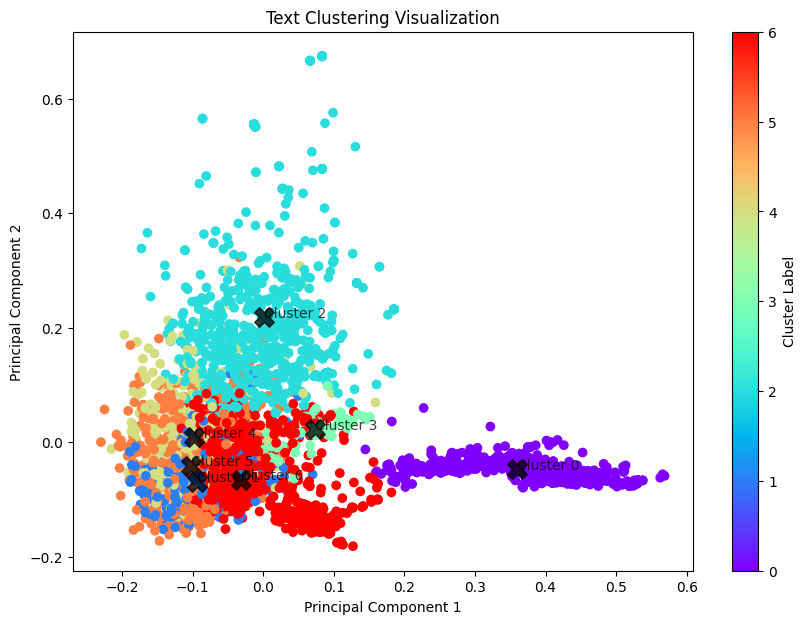

In [50]:
# Step 6: Visualization

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=model.labels_, cmap='rainbow')
plt.title("Text Clustering Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Adding cluster centers to the plot
centers = model.cluster_centers_
centers_reduced = pca.transform(centers)
plt.scatter(centers_reduced[:, 0], centers_reduced[:, 1], c='black', s=200, alpha=0.75, marker='X')

# Adding labels to the plot
# for i, txt in enumerate(texts):
#     plt.annotate(txt, (X_reduced[i, 0], X_reduced[i, 1]), fontsize=9, alpha=0.75)
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(number_of_clusters):
    plt.annotate(
        # ' '.join([terms[ind] for ind in order_centroids[i, :10]]),
        "Cluster %d" % i,
        (centers_reduced[i, 0], centers_reduced[i, 1]),
        fontsize=10,
        alpha=0.75)


plt.colorbar(scatter, label='Cluster Label')
plt.show()

In [51]:
# order_centroids = model.cluster_centers_.argsort()[:, ::-1]
# terms = vectorizer.get_feature_names_out()

In [55]:
for i in range(number_of_clusters):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])

Cluster 0:
 anh
 tx
 hđ
 phúc
 mỗ
 la
 th
 trung
 9170svnữ2b
 phú
Cluster 1:
 chị
 tài_liệu
 inbox
 2k10
 free
 bạn
 nhận
 cần
 nào
 file
Cluster 2:
 tiếng
 dạy
 anh
 gia_sư
 em
 mình
 online
 cần
 tìm
 lớp
Cluster 3:
 on
 gia_sư
 hà_nội
 bảo_hành
 30
 ngày
 anh
 6561
 11500gv2b
 tp
Cluster 4:
 bạn
 học
 mình
 nào
 tớ
 cùng
 tìm
 cần
 toán
 muốn
Cluster 5:
 ai
 không
 mình
 em
 học
 mọi_người
 giúp
 thì
 xin
 toán
Cluster 6:
 toán
 em
 học
 văn
 2k10
 thành_viên
 gì
 lớp
 nào
 tôi


In [69]:
import math
import random

testIndex1 = math.floor(random.random() * len(texts))
testIndex2 = math.floor(random.random() * len(texts))
testIndex3 = math.floor(random.random() * len(texts))

text1 = texts[testIndex1]
text2 = texts[testIndex2]
text3 = texts[testIndex3]

print (testIndex1, text1)
print (testIndex2, text2)
print (testIndex3, text3)


2192 mình bị mất góc tiếng anh thì phải làm_sao đây bắt_đầu học từ đâu ạ
2911 mình nhận dạy mất_gốc tiếng anh giá 20kh ai quan_tâm inbox
1596 tớ cần tìm 1 bạn nam hay nữ đều được kèm toán tớ tớ bị mất_gốc tớ trả phí dạy được nhaa


In [70]:
X1 = vectorizer.transform([text1])
cluster1 = model.predict(X1)[0]
print("Text belongs to cluster number {0}".format(cluster1))
for ind in order_centroids[cluster1, :10]:
    print(' %s' % terms[ind])

print()
X2 = vectorizer.transform([text2])
cluster2 = model.predict(X2)[0]
print("Text belongs to cluster number {0}".format(cluster2))
for ind in order_centroids[cluster2, :10]:
    print(' %s' % terms[ind])

print()
X3 = vectorizer.transform([text3])
cluster3 = model.predict(X3)[0]
print("Text belongs to cluster number {0}".format(cluster3))
for ind in order_centroids[cluster3, :10]:
    print(' %s' % terms[ind])

Text belongs to cluster number 5
 ai
 không
 mình
 em
 học
 mọi_người
 giúp
 thì
 xin
 toán

Text belongs to cluster number 2
 tiếng
 dạy
 anh
 gia_sư
 em
 mình
 online
 cần
 tìm
 lớp

Text belongs to cluster number 4
 bạn
 học
 mình
 nào
 tớ
 cùng
 tìm
 cần
 toán
 muốn
